In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
url = 'https://raw.githubusercontent.com/robertferro/carros/main/2%20-%20Manipula%C3%A7%C3%A3o%20de%20dados/carros_ml_categorias_pre_processados.csv'

In [2]:
df = pd.read_csv(url, sep = ',')

In [3]:
df.head()

,preco,quilometragem,ano,marca,modelo,informacoes
0,114900,100000,2013,volkswagem,Fox,1.0 Trend Tec Total Flex 5p
1,29990,71000,2012,citroen,C3,1.4 8v Glx Flex 5p
2,23990,84000,2013,volkswagem,Fox,1.0 Trend Tec Total Flex 5p
3,28990,10800,2019,ford,Ka,1.0 Se Flex 5p
4,47879,23000,2017,hyundai,Hb20,1.0 Comfort Plus Flex 5p


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12202 entries, 0 to 12201
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   preco          12202 non-null  int64 
 1   quilometragem  12202 non-null  uint64
 2   ano            12202 non-null  int64 
 3   marca          12202 non-null  object
 4   modelo         12202 non-null  object
 5   informacoes    12202 non-null  object
dtypes: int64(2), object(3), uint64(1)
memory usage: 572.1+ KB


In [ ]:
# pd.set_option('display.max_rows', 250)
# df.modelo.value_counts().tail(250)

In [5]:
df.shape

(12202, 6)

 ###  Criando a coluna motor

 - Fazendo um filtro na coluna informações e eliminando os dados não numéricos, iremos pegar apenas a potência do motor.

In [6]:
df.informacoes.value_counts()

2.3 Grand L2h2 5p                          282
2.3 Executive L3h2 16l 5p                  212
2.3 Extra L3h2 5p                          179
2.3 Multijet Longo Teto Alto Economy 5p    106
1.4 Standard Total Flex 3p                 103
                                          ... 
Classic 1.0 Life 4p Gasolina                 1
3 320i                                       1
A 1.6 Classic 5p 102 Hp                      1
Gla 2.0 Sport Turbo 5p                       1
Sedan 2.0 Comfort Flex Power 4p              1
Name: informacoes, Length: 2883, dtype: int64

 - Desenvolvendo  a função

In [7]:
# entrada = 'Hilux Sw4 4x4 3.0 Turbo Diesel'
entrada = 'Oroch Duster Oroch Dyna. 2.0 Flex 16v Aut.'

In [8]:
entrada = entrada.split()

In [9]:
entrada

['Oroch', 'Duster', 'Oroch', 'Dyna.', '2.0', 'Flex', '16v', 'Aut.']

In [10]:
nova_entrada = []
for num in  entrada :
    if len(num) == 3 and '.' in num:
        nova_entrada.append(num)

In [11]:
nova_entrada

['2.0']

In [12]:
if  len(nova_entrada) == 0:
     motor = np.nan
else:
    motor = nova_entrada

In [13]:
motor

['2.0']

 ## Função pra pegar a potênia do motor 

In [14]:
def pegar_potencia_do_motor(entrada):
    entrada = entrada.split()
    
    nova_entrada = []
    for num in  entrada :
        if len(num) == 3 and '.' in num:
            nova_entrada.append(num)
            
            
    if  len(nova_entrada) == 0:
         motor = np.nan
    else:
        motor = nova_entrada
        motor = motor[0]
    
    return motor

 - Testando a função

In [15]:
# entrada = 'Hilux Sw4 4x4 3.0 Turbo Diesel'
entrada = 'Oroch Duster Oroch Dyna. 2.0 Flex 16v Aut.'

In [16]:
pegar_potencia_do_motor(entrada)

'2.0'

 - Testando em um subset.

In [17]:
pot_subset = list(df.informacoes.head())

In [18]:
pot_subset.append(entrada)

In [19]:
pot_subset

['1.0 Trend Tec Total Flex 5p',
 '1.4 8v Glx Flex 5p',
 '1.0 Trend Tec Total Flex 5p',
 '1.0 Se Flex 5p',
 '1.0 Comfort Plus Flex 5p',
 'Oroch Duster Oroch Dyna. 2.0 Flex 16v Aut.']

In [20]:
for pot in pot_subset:
  print(pegar_potencia_do_motor(pot))

1.0
1.4
1.0
1.0
1.0
2.0


 - Criando a coluna motor

In [21]:
df['motor'] = df['informacoes'].apply(pegar_potencia_do_motor)

In [22]:
df.head()

,preco,quilometragem,ano,marca,modelo,informacoes,motor
0,114900,100000,2013,volkswagem,Fox,1.0 Trend Tec Total Flex 5p,1.0
1,29990,71000,2012,citroen,C3,1.4 8v Glx Flex 5p,1.4
2,23990,84000,2013,volkswagem,Fox,1.0 Trend Tec Total Flex 5p,1.0
3,28990,10800,2019,ford,Ka,1.0 Se Flex 5p,1.0
4,47879,23000,2017,hyundai,Hb20,1.0 Comfort Plus Flex 5p,1.0


In [23]:
# def pegar_potencia_do_motor(entrada):

#     entrada = entrada.split()

#     lista = [] []
#     for num in entrada:
#         m = re.sub('[^0-9 - $ # @]', '', num)
#         lista.append(m)

#     nova_lista=[]
#     nova_lista_2 = []
#     for num in lista :
#         if len(num) == 2:
#             nova_lista.append(num)
#         else:
#             num = np.nan
#             nova_lista_2.append(num)


#     if  len(nova_lista) == 0:
#          motor = np.nan
#     else:
#         nova_lista = nova_lista[0]
#         novo = nova_lista.replace('', '.')
#         motor = novo[1:4]

#     return motor

 - Visualizando os dados referentes a nova coluna.

In [24]:
len(df.motor.value_counts())

37

In [25]:
df.motor.value_counts().tail(58)

1.6    1888
2.0    1811
2.3    1557
1.4    1370
1.0    1240
1.8    1232
2.2     569
1.5     451
2.8     282
2.5     280
2.4     206
3.0     186
1.3     119
3.2      88
3.6      75
3.5      59
2.7      58
3.3      33
3.8      28
1.2      20
1.9      14
1.7      13
4.2      12
3.9      12
2.6      10
4.0      10
5.9       5
6.7       5
4.4       4
4.3       4
E.l       3
1.1       2
3.7       2
5.2       1
6.2       1
4.1       1
5.0       1
Name: motor, dtype: int64

 - Verificando um registro considerado estranho.

In [26]:
df.query(' motor =="E.l"')

,preco,quilometragem,ano,marca,modelo,informacoes,motor
2145,165900,0,2021,mercedes,Sprinter,Furgão 516 T.a. E.l,E.l
4014,165900,0,2021,mercedes,Sprinter,Furgão 516 T.a. E.l,E.l
9417,199900,0,2021,mercedes,Sprinter,T.a. E.l,E.l


In [27]:
df.iloc[2145,6] = '2.2'

In [28]:
df.iloc[4014,6] = '2.2'

In [29]:
df.iloc[9417,6] = '2.2'

In [30]:
df.query(' motor =="E.l"')

,preco,quilometragem,ano,marca,modelo,informacoes,motor


In [31]:
len(df.motor.value_counts())

36

In [32]:
df.motor.value_counts()

1.6    1888
2.0    1811
2.3    1557
1.4    1370
1.0    1240
1.8    1232
2.2     572
1.5     451
2.8     282
2.5     280
2.4     206
3.0     186
1.3     119
3.2      88
3.6      75
3.5      59
2.7      58
3.3      33
3.8      28
1.2      20
1.9      14
1.7      13
4.2      12
3.9      12
2.6      10
4.0      10
5.9       5
6.7       5
4.4       4
4.3       4
1.1       2
3.7       2
5.2       1
6.2       1
4.1       1
5.0       1
Name: motor, dtype: int64

 - Reordenando as colunas

In [33]:
df = df[['marca', 'modelo','motor','informacoes','ano','quilometragem', 'preco']]

In [34]:
df.head()

,marca,modelo,motor,informacoes,ano,quilometragem,preco
0,volkswagem,Fox,1.0,1.0 Trend Tec Total Flex 5p,2013,100000,114900
1,citroen,C3,1.4,1.4 8v Glx Flex 5p,2012,71000,29990
2,volkswagem,Fox,1.0,1.0 Trend Tec Total Flex 5p,2013,84000,23990
3,ford,Ka,1.0,1.0 Se Flex 5p,2019,10800,28990
4,hyundai,Hb20,1.0,1.0 Comfort Plus Flex 5p,2017,23000,47879


 - Mudando o formato de algumas colunas.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12202 entries, 0 to 12201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   marca          12202 non-null  object
 1   modelo         12202 non-null  object
 2   motor          11652 non-null  object
 3   informacoes    12202 non-null  object
 4   ano            12202 non-null  int64 
 5   quilometragem  12202 non-null  uint64
 6   preco          12202 non-null  int64 
dtypes: int64(2), object(4), uint64(1)
memory usage: 667.4+ KB


In [36]:
df['quilometragem'] = df['quilometragem'].astype(int)

In [43]:
df['motor'] = df['motor'].astype(float)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12202 entries, 0 to 12201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   marca          12202 non-null  object 
 1   modelo         12202 non-null  object 
 2   motor          11652 non-null  float64
 3   informacoes    12202 non-null  object 
 4   ano            12202 non-null  int64  
 5   quilometragem  12202 non-null  int32  
 6   preco          12202 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 619.8+ KB


 - Verificando a existência de valores nulos.

In [45]:
df.isna().sum()

marca              0
modelo             0
motor            550
informacoes        0
ano                0
quilometragem      0
preco              0
dtype: int64

In [46]:
df.describe()

,motor,ano,quilometragem,preco
count,11652.000000,12202.000000,1.220200e+04,1.220200e+04
mean,1.864478,2120.294952,5.870014e+03,8.022495e+04
std,0.566491,6746.953262,2.009298e+07,3.668699e+05
min,1.000000,1966.000000,-1.981284e+09,1.000000e+03
25%,1.500000,2011.000000,1.220000e+02,3.300000e+04
50%,1.800000,2015.000000,7.300000e+04,5.798000e+04
75%,2.300000,2019.000000,1.250000e+05,1.003675e+05
max,6.700000,436662.000000,1.000000e+09,3.990000e+07


In [47]:
df.corr()

,motor,ano,quilometragem,preco
motor,1.000000,0.000226,-0.004768,0.045340
ano,0.000226,1.000000,0.000087,-0.001558
quilometragem,-0.004768,0.000087,1.000000,-0.003565
preco,0.045340,-0.001558,-0.003565,1.000000


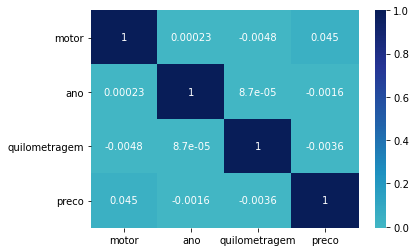

In [48]:
sns.heatmap(df.corr(), annot=True, center=0, cmap="YlGnBu")

- Gerando algumas visualizações.

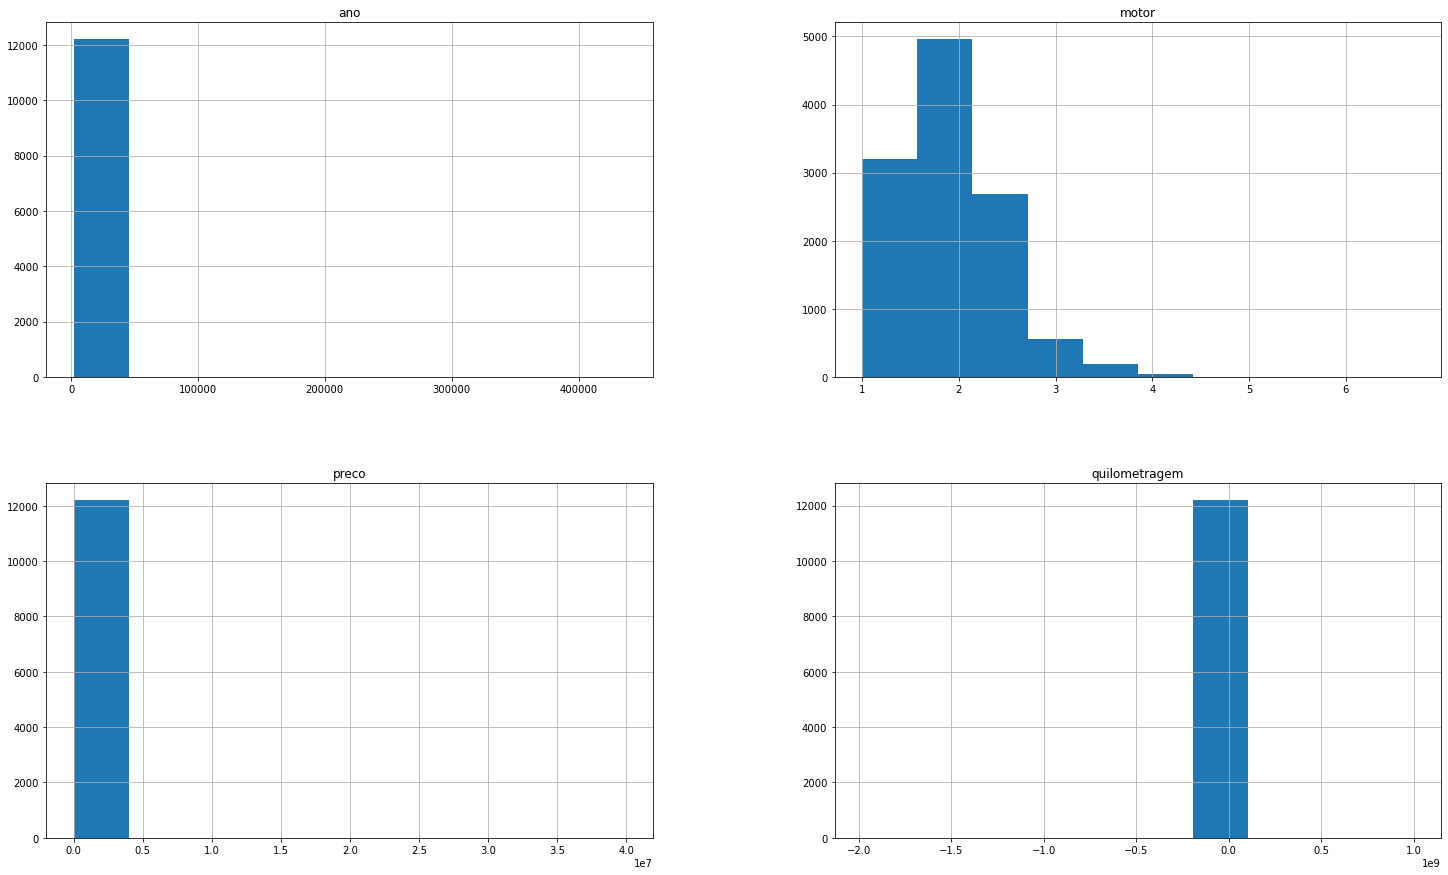

In [49]:
df.hist(figsize=(25,15))
plt.show()

C:\Users\Biena\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Biena\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


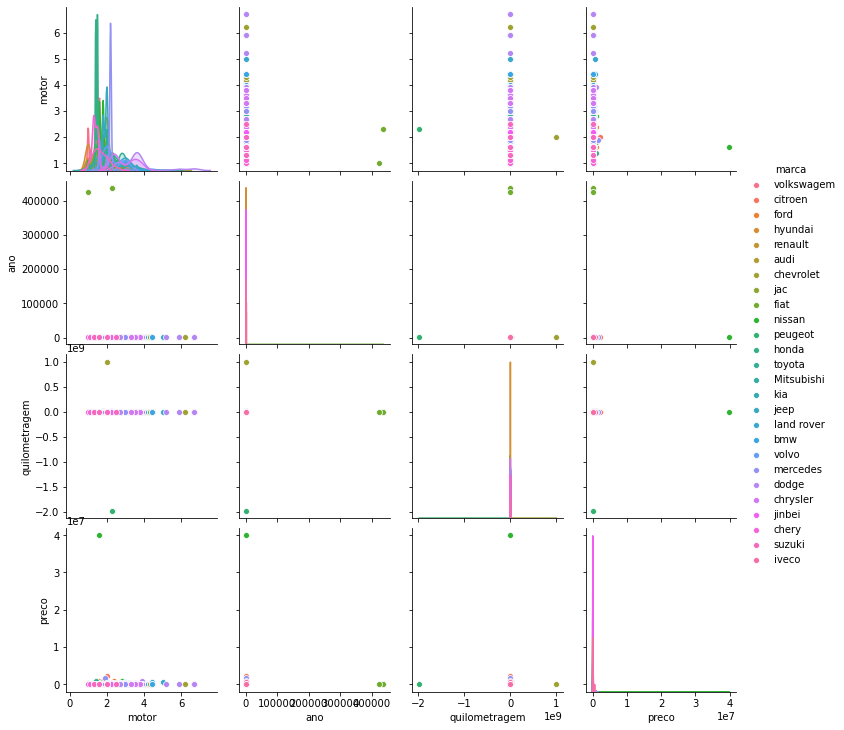

In [50]:
sns.pairplot(data = df, hue = 'marca')

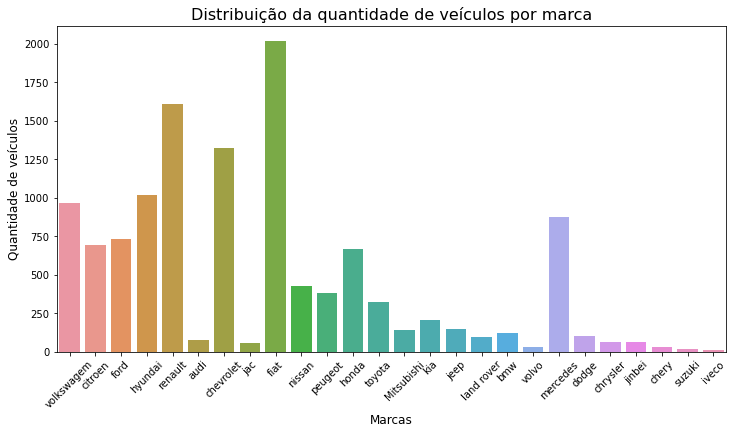

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(x = df['marca'],data = df)
plt.title('Distribuição da quantidade de veículos por marca', fontsize = 16)
plt.xlabel('Marcas', fontsize = 12)
plt.ylabel('Quantidade de veículos', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

In [103]:
df.head()

,marca,modelo,motor,informacoes,ano,quilometragem,preco
0,volkswagem,Fox,1.0,1.0 Trend Tec Total Flex 5p,2013,100000,114900
1,citroen,C3,1.4,1.4 8v Glx Flex 5p,2012,71000,29990
2,volkswagem,Fox,1.0,1.0 Trend Tec Total Flex 5p,2013,84000,23990
3,ford,Ka,1.0,1.0 Se Flex 5p,2019,10800,28990
4,hyundai,Hb20,1.0,1.0 Comfort Plus Flex 5p,2017,23000,47879


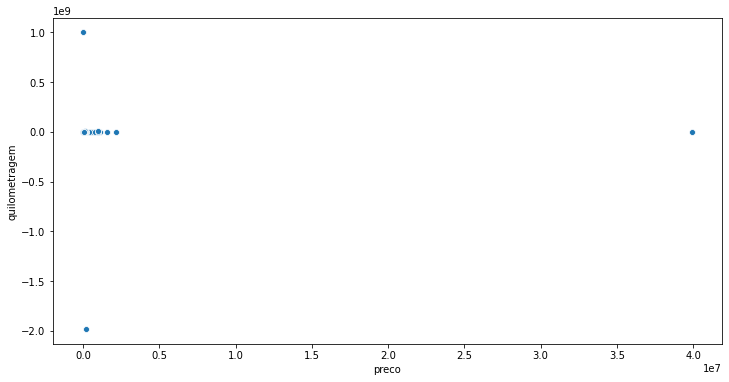

In [112]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = df, y = "quilometragem", x="preco" )

In [ ]:
df.query('preco == 39900000.0')